In [1]:
# -*-coding:utf-8 -*-
#目标求解2*sin(x)+cos(x)最大值
import random
import math
import matplotlib.pyplot as plt

0.9957167619380484


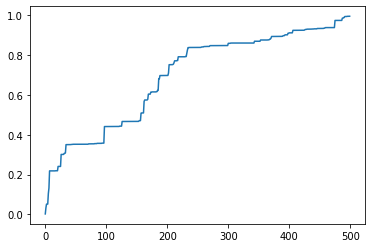

In [2]:
class GA(object):
#初始化种群 生成chromosome_length大小的population_size个个体的种群
 
    def __init__(self,population_size,chromosome_length,max_value,pc,pm):

        self.population_size=population_size
        self.choromosome_length=chromosome_length
        # self.population=[[]]
        self.max_value=max_value
        self.pc=pc
        self.pm=pm
        # self.fitness_value=[]

    def species_origin(self):
        population=[[]]
        for i in range(self.population_size):

            temporary=[]
        #染色体暂存器
            for j in range(self.choromosome_length):

                temporary.append(random.randint(0,1))
            #随机产生一个染色体,由二进制数组成

            population.append(temporary)
            #将染色体添加到种群中
        return population[1:]
            # 将种群返回，种群是个二维数组，个体和染色体两维

    #从二进制到十进制
    #编码  input:种群,染色体长度 编码过程就是将多元函数转化成一元函数的过程
    def translation(self,population):

        temporary=[]
        for i in range(len(population)):
            total=0
            for j in range(self.choromosome_length):
                total+=population[i][j]*(math.pow(2,j))
            #从第一个基因开始，每位对2求幂，再求和
            # 如：0101 转成十进制为：1 * 20 + 0 * 21 + 1 * 22 + 0 * 23 = 1 + 0 + 4 + 0 = 5
            temporary.append(total)
        #一个染色体编码完成，由一个二进制数编码为一个十进制数
        return temporary
        # 返回种群中所有个体编码完成后的十进制数
        # from protein to function,according to its functoin value      
        # a protein realize its function according its structure
        # 目标函数相当于环境 对染色体进行筛选，这里是2*sin(x)+math.cos(x)
    def function(self,population):
        temporary=[]
        function1=[]
        temporary=self.translation(population)
        for i in range(len(temporary)):
            x=temporary[i]*self.max_value/(math.pow(2,self.choromosome_length)-10)
            function1.append(math.exp(-(x-0.1)**2)*
                             math.sin(6*math.pi*x**0.75)*math.sin(6*math.pi*x**0.75))
         #这里将sin(x)作为目标函数
        return function1

#定义适应度
    def fitness(self,function1):
        fitness_value=[]
        num=len(function1)
        for i in range(num):
            if(function1[i]>0):
                temporary=function1[i]
            else:
                temporary=0.0
        # 如果适应度小于0,则定为0

            fitness_value.append(temporary)
        #将适应度添加到列表中

        return fitness_value

#计算适应度和
 
    def sum(self,fitness_value):
        total=0

        for i in range(len(fitness_value)):
            total+=fitness_value[i]
        return total

#计算适应度斐伯纳且列表
    def cumsum(self,fitness1):
        for i in range(len(fitness1)-2,-1,-1):
        # range(start,stop,[step])
        # 倒计数
            total=0
            j=0

            while(j<=i):
                 total+=fitness1[j]
                 j+=1

            fitness1[i]=total
            fitness1[len(fitness1)-1]=1


#3.选择种群中个体适应度最大的个体
    def selection(self,population,fitness_value):
        new_fitness=[]
    #单个公式暂存器
        total_fitness=self.sum(fitness_value)
    #将所有的适应度求和
        for i in range(len(fitness_value)):
            new_fitness.append(fitness_value[i]/total_fitness)
    #将所有个体的适应度正则化
        self.cumsum(new_fitness)
    #
        ms=[]
    #存活的种群
        population_length=pop_len=len(population)
    #求出种群长度
    #根据随机数确定哪几个能存活

        for i in range(pop_len):
            ms.append(random.random())
    # 产生种群个数的随机值
    # ms.sort()
    # 存活的种群排序
        fitin=0
        newin=0
        new_population=new_pop=population

    #轮盘赌方式
        while newin<pop_len:
              if(ms[newin]<new_fitness[fitin]):
                 new_pop[newin]=population[fitin]
                 newin+=1
              else:
                 fitin+=1
        population=new_pop

#4.交叉操作
    def crossover(self,population):
#pc是概率阈值，选择单点交叉还是多点交叉，生成新的交叉个体，这里没用
        pop_len=len(population)

        for i in range(pop_len-1):

            if(random.random()<self.pc):

               cpoint=random.randint(0,len(population[0]))
           #在种群个数内随机生成单点交叉点
               temporary1=[]
               temporary2=[]

               temporary1.extend(population[i][0:cpoint])
               temporary1.extend(population[i+1][cpoint:len(population[i])])
           #将tmporary1作为暂存器，暂时存放第i个染色体中的前0到cpoint个基因，
           #然后再把第i+1个染色体中的后cpoint到第i个染色体中的基因个数，补充到temporary2后面

               temporary2.extend(population[i+1][0:cpoint])
               temporary2.extend(population[i][cpoint:len(population[i])])
        # 将tmporary2作为暂存器，暂时存放第i+1个染色体中的前0到cpoint个基因，
        # 然后再把第i个染色体中的后cpoint到第i个染色体中的基因个数，补充到temporary2后面
               population[i]=temporary1
               population[i+1]=temporary2
        # 第i个染色体和第i+1个染色体基因重组/交叉完成
    def mutation(self,population):
     # pm是概率阈值
         px=len(population)
    # 求出种群中所有种群/个体的个数
         py=len(population[0])
    # 染色体/个体基因的个数
         for i in range(px):
             if(random.random()<self.pm):
                mpoint=random.randint(0,py-1)
            #
                if(population[i][mpoint]==1):
               #将mpoint个基因进行单点随机变异，变为0或者1
                   population[i][mpoint]=0
                else:
                   population[i][mpoint]=1

#transform the binary to decimalism
# 将每一个染色体都转化成十进制 max_value,再筛去过大的值
    def b2d(self,best_individual):
        total=0
        b=len(best_individual)
        for i in range(b):
            total=total+best_individual[i]*math.pow(2,i)

        total=total*self.max_value/(math.pow(2,self.choromosome_length)-1)
        return total

#寻找最好的适应度和个体
 
    def best(self,population,fitness_value):

        px=len(population)
        bestindividual=[]
        bestfitness=fitness_value[0]
        # print(fitness_value)

        for i in range(1,px):
   # 循环找出最大的适应度，适应度最大的也就是最好的个体
            if(fitness_value[i]>bestfitness):

               bestfitness=fitness_value[i]
               bestindividual=population[i]

        return [bestindividual,bestfitness]

    def plot(self, results):
        X = []
        Y = [] 
        for i in range(500):
            X.append(i)
            Y.append(results[i][0])

        plt.plot(X, Y)
        plt.show()

    def main(self):

        results = [[]]
        fitness_value = []
        fitmean = []

        population = pop = self.species_origin()

        for i in range(500):
            function_value = self.function(population)
            # print('fit funtion_value:',function_value)
            fitness_value = self.fitness(function_value)
            # print('fitness_value:',fitness_value)

            best_individual, best_fitness = self.best(population,fitness_value)
            results.append([best_fitness, self.b2d(best_individual)])
        # 将最好的个体和最好的适应度保存，并将最好的个体转成十进制,适应度函数
            self.selection(population,fitness_value)
            self.crossover(population)
            self.mutation(population)
        results = results[1:]
        results.sort()
        print(results[499][0])
        self.plot(results)   

if __name__ == '__main__':
    population_size=400
    max_value=10
    chromosome_length=20
    pc=0.6
    pm=0.01
    ga=GA(population_size,chromosome_length,max_value,pc,pm)
    ga.main()
   